# Capstone project: Shelter animal exploration

In [1]:
#Importing all the needed python packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualisation
import csv as csv
import matplotlib.pyplot as plt #visualisation
%matplotlib inline


## Load the data

 - Data retrieved from https://www.kaggle.com/c/shelter-animal-outcomes
 - The data comes from Austin Animal Center from October 1st, 2013 to March, 2016.  All animals receive a unique Animal ID during intake. 
 - Outcomes represent the status of animals as they leave the Animal Center. These outcomes of animals include: Adoption, Died, Euthanasia, Return to owner and Transfer. 
 - The idea is to correctly predict an animal's outcome based on its characteristics.

In [2]:
#Importing all the data
df = pd.read_excel ("D:/Users/Ivič/Documents/faks/Capstone/shelter-animal-outcomes/train.xlsx")
tt = pd.read_excel ("D:/Users/Ivič/Documents/faks/Capstone/shelter-animal-outcomes/test.xlsx")
df = df.set_index('AnimalID')

## Exploratory analysis

In [3]:
#Let us first see the first few values of the dataset
df.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [4]:
df.describe()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,6374,22918,5,16,2,5,44,1380,366
top,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,136,19,10769,7816,15595,9779,3969,8810,2824
first,NaN,2013-10-01 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-02-21 19:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['OutcomeType'].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [6]:
#Let's see if there are any values missing in our dataset
df.isna().sum()

Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [7]:
#Check the outcome possibilities
df["OutcomeType"].unique()

array(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'],
      dtype=object)

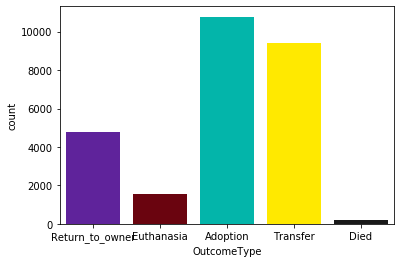

In [8]:
# See the distribution of outcome
palette = ["#5f239b", "#6a040f", "#03b5aa", "#ffe900", "#191919"]
sns.countplot(x="OutcomeType",data=df, palette=palette, saturation=1)


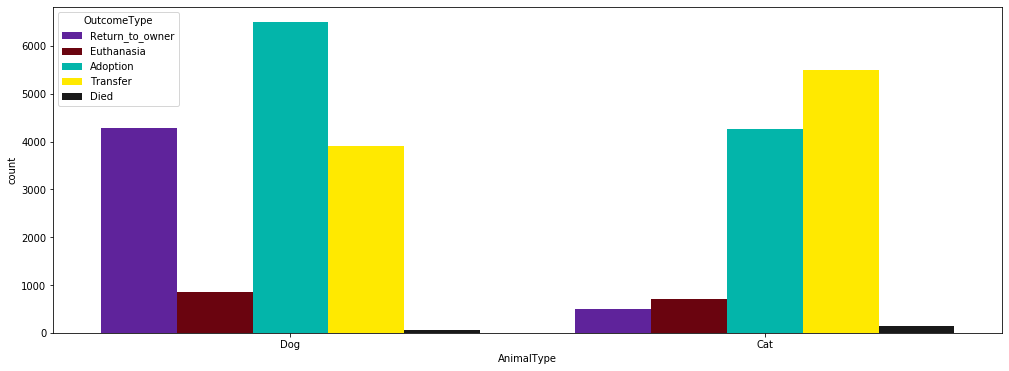

In [9]:
# See the outcome based on animal type
plt.figure(figsize=(17,6))
sns.countplot(x="AnimalType",hue="OutcomeType",data=df, palette=palette, saturation = 1)

In [10]:
#Let's see what is contained in the column "SexuponOutcome" to see how it may affect the outcome of animals
df["SexuponOutcome"].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

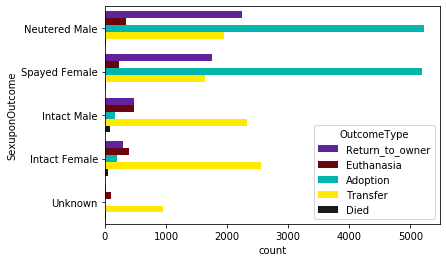

In [11]:
# Since there are some Nan in the SexuponOutcome column, but also Unknown, we will transform all the Nan to Unknown
df["SexuponOutcome"]=df["SexuponOutcome"].fillna("Unknown")


# Plot outcome based on sex
sns.countplot(y="SexuponOutcome",data=df,hue="OutcomeType", palette = palette, saturation=1)

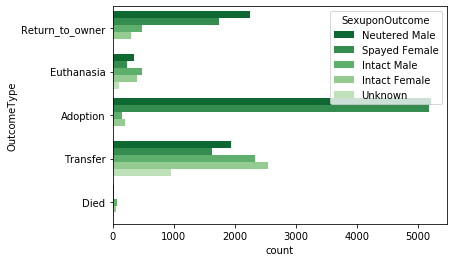

In [12]:
# Plot outcome based on sex
sns.countplot(y="OutcomeType",data=df,hue="SexuponOutcome", palette=sns.color_palette("Greens_r", 6), saturation=0.84)

Neutered and spayed animals have a much bigger chance of being adopted, as can be seen from the graph

### Seasonality
Let us now make a time series, and see whether there is any seasonality in the outcome types of the animals

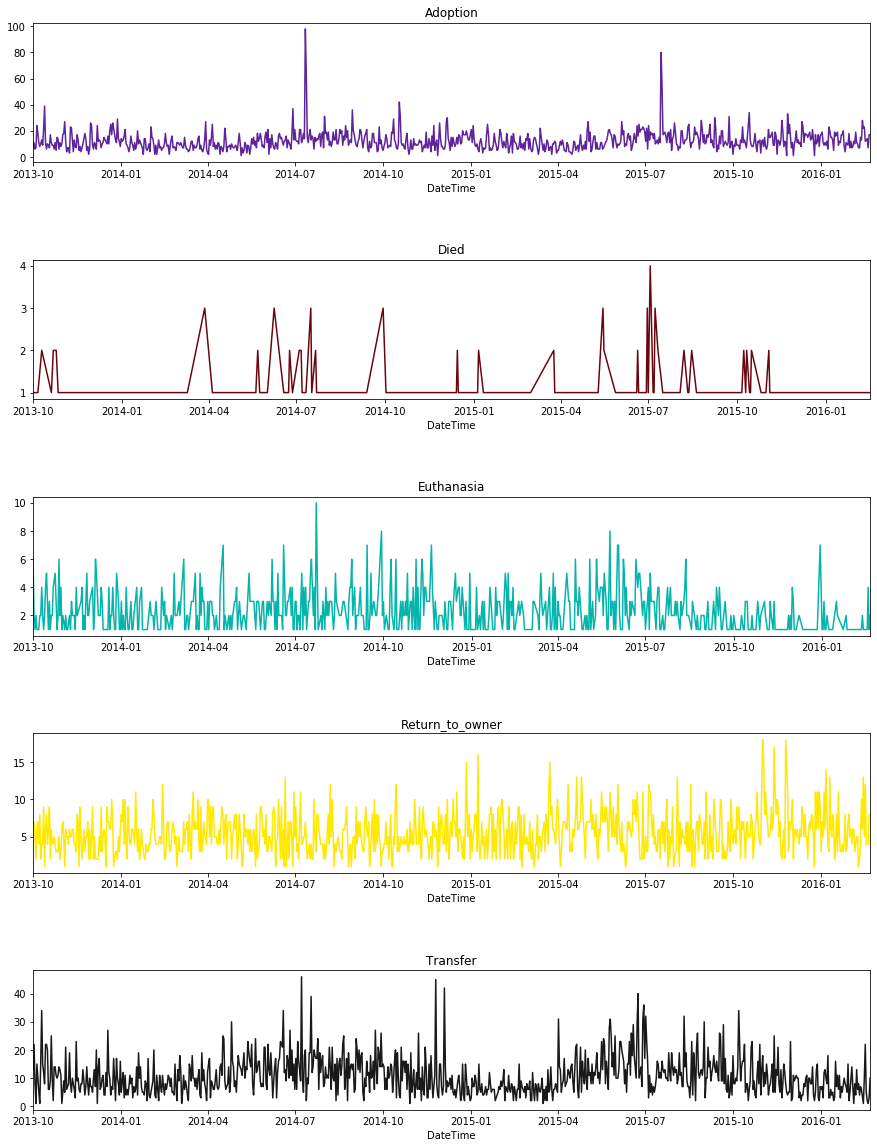

In [13]:
# Time series for each outcome
df["DateTime"] = pd.to_datetime(df["DateTime"]).dt.date
monthGroup=df["DateTime"].groupby(df["OutcomeType"])
plt.subplots(5, 1, figsize=(15, 20), sharex=True)
plt.subplots_adjust( hspace=0.7)
for i, (_, g) in enumerate(monthGroup):
    plt.subplot(5,1,i+1)
    plt.title(_)
    g.groupby(df["DateTime"]).count().plot(kind="line", color=palette[i])

From the data presented as above, we might say that both transfers and adoptions seem to be higher during the summer, and then slow down during the winter, but it's hard to tell from so much data.
To rectify this, we will make some monthtly time series visualisations.

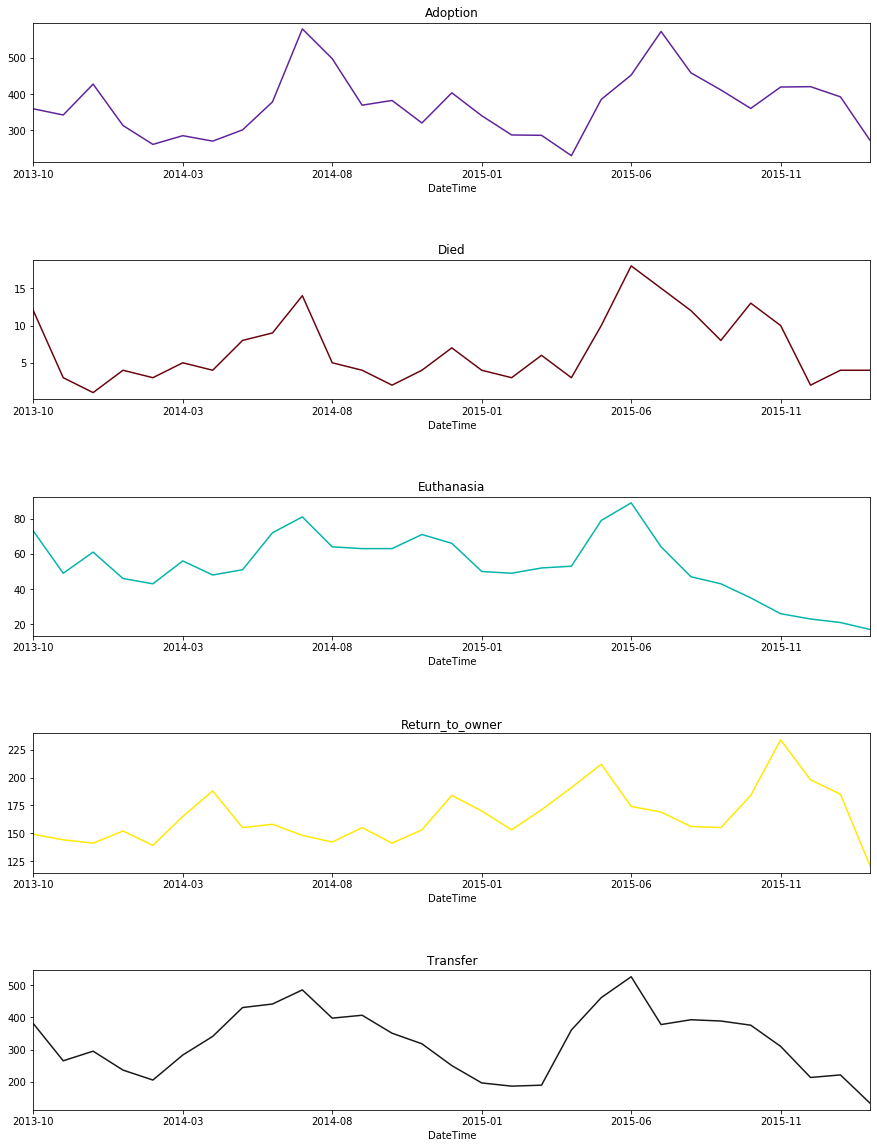

In [14]:
#Monthly time series
df_ym=df.DateTime.map(lambda x: x.strftime('%Y-%m'))
df_ym_outcomeGroup = df_ym.groupby(df["OutcomeType"])

plt.subplots(5, 1, figsize=(15, 20), sharex=True)
plt.subplots_adjust( hspace=0.7)
for i, (_, g) in enumerate(df_ym_outcomeGroup):
    plt.subplot(5,1,i+1)
    plt.title(_)
    g.groupby(df_ym).count().plot(kind="line", color=palette[i])

### Calculate age of animals
Another important adoption parameter is age, but in the data, we have it written in different units; years, months, weeks and days. We will need to turn those words into numbers to make a proper visualization.
To start off, let's take a look at how many animals of each age there are in the shelter.

In [15]:
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0

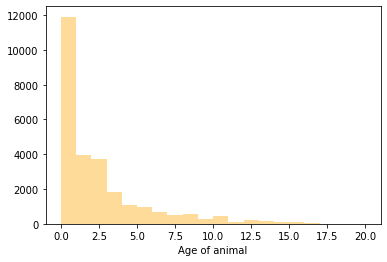

In [16]:
df['AgeInYears'] = df.AgeuponOutcome.apply(calc_age_in_years)
sns.distplot(df.AgeInYears, bins = 20,kde=False, color='orange', axlabel = 'Age of animal')


Most of the animals in the shelter less than a year old. Let's make a few graphs to show the effect of the age of the animal on the outcome. To be able to visualize this nicely, we will make categories out of the years of animals

In [17]:
def calc_age_category(x):
    if x < 3: return 'young'
    if x < 5: return 'young adult'
    if x < 10: return 'adult'
    return 'old'
df['AgeCategory'] = df.AgeInYears.apply(calc_age_category)


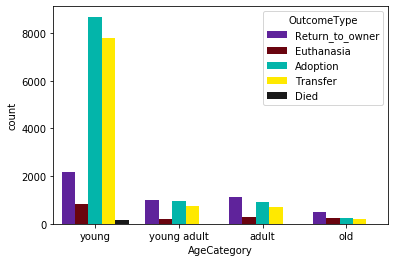

In [18]:
sns.countplot(data=df, x='AgeCategory',hue='OutcomeType',  palette = palette, saturation=1)

As might be expected, younger animals have a higher chance of being adopted or transferred. Adult and older animals have almost equal probabilites of being returned to owner, adopted or transfered.

## Machine Learning Model

In [19]:
# Prepare for training data
ytrain = df["OutcomeType"]
Xtrain = df.drop(["DateTime", "OutcomeType","OutcomeSubtype","AgeuponOutcome","Name", "AgeCategory"],axis=1)

#To get rid of all the Nan values in the training dataset, we replace them with -1
#We don't use 0 because it's already used in the dataset
Xtrain=Xtrain.fillna(-1)

Xtrain.head()

,AnimalType,SexuponOutcome,Breed,Color,AgeInYears
AnimalID,,,,,
A671945,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1.000000
A656520,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1.000000
A686464,Dog,Neutered Male,Pit Bull Mix,Blue/White,2.000000
A683430,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0.057692
A667013,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,2.000000


In [20]:
# Encode categorical data
from sklearn import preprocessing
le_anima = preprocessing.LabelEncoder()
Xtrain.AnimalType = le_anima.fit_transform(Xtrain.AnimalType)
le_sex = preprocessing.LabelEncoder()
Xtrain.SexuponOutcome = le_sex.fit_transform(Xtrain.SexuponOutcome)
le_breed = preprocessing.LabelEncoder()
Xtrain.Breed = le_breed.fit_transform(Xtrain.Breed)
le_color = preprocessing.LabelEncoder()
Xtrain.Color = le_color.fit_transform(Xtrain.Color)
le_out = preprocessing.LabelEncoder()
ytrain = le_out.fit_transform(ytrain)

In [21]:
#Let's see
Xtrain.head()

,AnimalType,SexuponOutcome,Breed,Color,AgeInYears
AnimalID,,,,,
A671945,1,2,1221,130,1.000000
A656520,0,3,640,167,1.000000
A686464,1,2,1066,86,2.000000
A683430,0,1,640,42,0.057692
A667013,1,2,914,274,2.000000


### Single Decision Tree

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import ValidationCurve


In [23]:
X_scaled = StandardScaler().fit_transform(Xtrain)

X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=5)

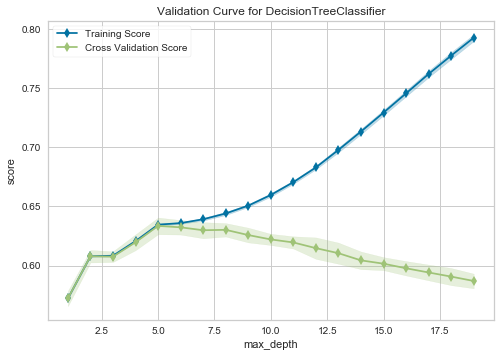

In [24]:
sizes = np.linspace(0.3, 1.0, 10)

param_range = np.arange(1, 20)
#cv = StratifiedKFold(10)

# Create the learning curve visualizer, fit and poof
viz = ValidationCurve(
    DecisionTreeClassifier(), param_name="max_depth", param_range=param_range,
    cv=10, scoring='accuracy')

viz.fit(Xtrain, ytrain)
viz.poof()

In [25]:
#We choose depth of 5 since it is the best according to cross validation
max_depth = 5

eval_scores = cross_val_score(DecisionTreeClassifier(max_depth=max_depth), Xtrain, ytrain, scoring="accuracy", cv=10, n_jobs=11)
print("Decision Tree with depth {} - Accuracy score:".format(max_depth), np.mean(eval_scores))

Decision Tree with depth 5 - Accuracy score: 0.6334708082930849


In [26]:
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
model.score(X_test, y_test)

0.6251402918069585

###  Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
# Do random forest
rf = RandomForestClassifier(n_estimators=25)
rf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
# Let's see the train accuracy
tra_score=rf.score(Xtrain, ytrain)
print("Training accuracy ",tra_score)

Training accuracy  0.8582064424407947


In [83]:
#Manipulating the test data to make the test possible
IDtest=tt["ID"]
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0
tt['AgeInYears'] = tt.AgeuponOutcome.apply(calc_age_in_years)
Xtest=tt.drop(["ID","Name", "AgeuponOutcome", "DateTime"], axis=1)


In [84]:
#Encoding the test data
Xtest.AnimalType = le_anima.fit_transform(Xtest.AnimalType)
Xtest.SexuponOutcome = le_sex.fit_transform(Xtest.SexuponOutcome)
Xtest.Breed = le_breed.fit_transform(Xtest.Breed)
Xtest.Color = le_color.fit_transform(Xtest.Color)
Xtest.head()

,AnimalType,SexuponOutcome,Breed,Color,AgeInYears
0,1,0,542,185,0.833333
1,1,3,460,28,2.000000
2,0,2,407,79,1.000000
3,1,1,345,229,0.333333
4,1,2,633,238,2.000000


In [85]:
#Replacing all Nan in the training dataset with -1
#we don't use 0 because it's already used in the dataset
#just as we did with the training dataset
Xtest=Xtest.fillna(-1)

In [86]:
Xtest.head()

,AnimalType,SexuponOutcome,Breed,Color,AgeInYears
0,1,0,542,185,0.833333
1,1,3,460,28,2.000000
2,0,2,407,79,1.000000
3,1,1,345,229,0.333333
4,1,2,633,238,2.000000


In [91]:
#Get prediction
ytest=rf.predict(Xtest)
ytestproba=rf.predict_proba(Xtest)
yfin=le_out.inverse_transform(ytest)

In [92]:
yprint = pd.DataFrame()
yprint["ID"]=IDtest
yprint["Adoption"] = (yfin=="Adoption").astype(int)
yprint["Died"] = (yfin=="Died").astype(int)
yprint["Euthanasia"] = (yfin=="Euthanasia").astype(int)
yprint["Return_to_owner"] = (yfin=="Return_to_owner").astype(int)
yprint["Transfer"] = (yfin=="Transfer").astype(int)

In [93]:
yprint.to_csv("submit_randomforest.csv",index=False)

In [94]:
f=open("submit_rfproba.csv","w")
filewrite=csv.writer(f)
filewrite.writerow(["ID","Adoption","Died","Euthanasia","Return_to_owner","Transfer"])
for i in range(len(ytestproba)):
    filewrite.writerow([IDtest[i],ytestproba[i,0],ytestproba[i,1],ytestproba[i,2],ytestproba[i,3],ytestproba[i,4]])
f.close()

In [95]:
#How is our training accuracy?
yt_pred = rf.predict(Xtrain)
np.mean(ytrain==yt_pred)

0.8026113958621722

In [96]:
# Let us try again but without using Breed and Color feature
Xtrain2 = Xtrain.drop(["Breed","Color"],axis=1)
rf2 = RandomForestClassifier(n_estimators=1000)
rf2.fit(Xtrain2, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
# How is our training accuracy now?
yt_pred2 = rf2.predict(Xtrain2)
np.mean(ytrain==yt_pred2)

0.6411762505144225

In [98]:
#Get prediction and print!
Xtest2 = Xtest.drop(["Breed","Color"],axis=1);
ytest2 = rf2.predict(Xtest2)
ytestproba2 = rf2.predict_proba(Xtest2)
yfin2 = le_out.inverse_transform(ytest2)

f=open("submit_rfproba2.csv","w")
filewrite=csv.writer(f)
filewrite.writerow(["ID","Adoption","Died","Euthanasia","Return_to_owner","Transfer"])
for i in range(len(ytestproba2)):
    filewrite.writerow([IDtest[i],ytestproba2[i,0],ytestproba2[i,1],ytestproba2[i,2],ytestproba2[i,3],ytestproba2[i,4]])
f.close()

Our training accuracy was greatly increased when using the Random Forest Classifier instead of the Decision Tree Classifier. Moreover, it was better when we included breed and color in our predictions, which tells us that these two things are important for the future of animals at the Austin animal shelter.

### References:

https://www.kaggle.com/uchayder/take-a-look-at-the-data

https://www.kaggle.com/albadr/shelter-animal-exploration